# Business cycles across countries


In [29]:
import numpy as np
import fredapi
import matplotlib.pyplot as plt
import pandas as pd
import eurostat
import statsmodels.api as sm

CB =  ['#000000','#004488','#BB5566','#DDAA33', 'purple']
LS = ['solid', 'dashed', ':', '-.']


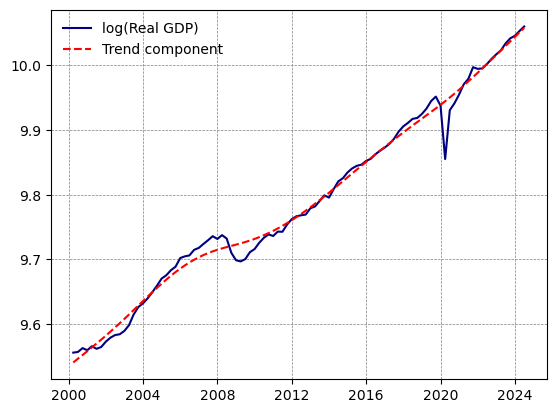

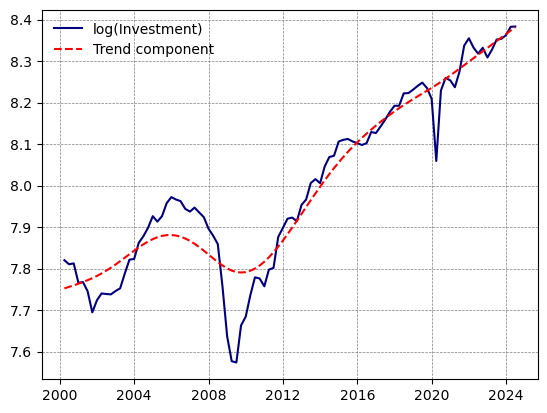

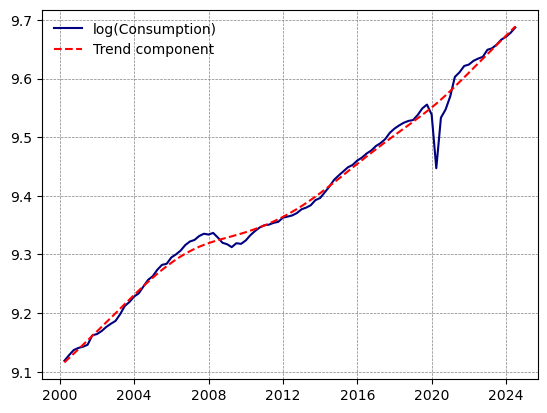

In [197]:
from fredapi import Fred #need to install this
fred = Fred(api_key='c0a963cd5bd17449f6d4b6a4e8d18f14')
mult = 6

## US Business cyles
us_gdp = fred.get_series('GDPC1') #gdp
us_inv = fred.get_series('GPDIC1') #investment
us_cons = fred.get_series('PCECC96') #consumption
us_rec = fred.get_series('USREC')*mult #recession indicator
tmprec = us_rec*-1 #recession indicator

us_gdp_df = np.log(us_gdp[70:])
us_inv_df = np.log(us_inv[70:])
us_cons_df = np.log(us_cons[70:])
# only from 2000 and onwards
us_gdp_df = us_gdp_df[us_gdp_df.index > '2000-01-01']
us_inv_df = us_inv_df[us_inv_df.index > '2000-01-01']
us_cons_df = us_cons_df[us_cons_df.index > '2000-01-01']

## HP Filter, gdp
cycle, trend = sm.tsa.filters.hpfilter(us_gdp_df, lamb=1600)
cycle = cycle*100

## HP Filter, investment
cycle_inv, trend_inv = sm.tsa.filters.hpfilter(us_inv_df, lamb=1600)
cycle_inv = cycle_inv*100

## HP Filter, consumption
cycle_cons, trend_cons = sm.tsa.filters.hpfilter(us_cons_df, lamb=1600)
cycle_cons = cycle_cons*100

## GDP and trend component
plt.plot(us_gdp_df,color="navy", label = 'log(Real GDP)')
plt.plot(trend,color="red", linestyle = 'dashed', label = 'Trend component')
plt.legend(frameon=False)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('us_bc2.pdf')
plt.show()

#investment and trend component
plt.plot(us_inv_df,color="navy", label = 'log(Investment)')
plt.plot(trend_inv,color="red", linestyle = 'dashed', label = 'Trend component')
plt.legend(frameon=False)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('us_bc2_inv.pdf')
plt.show()

#consumption and trend component
plt.plot(us_cons_df,color="navy", label = 'log(Consumption)')
plt.plot(trend_cons,color="red", linestyle = 'dashed', label = 'Trend component')
plt.legend(frameon=False)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('us_bc2_cons.pdf')
plt.show()

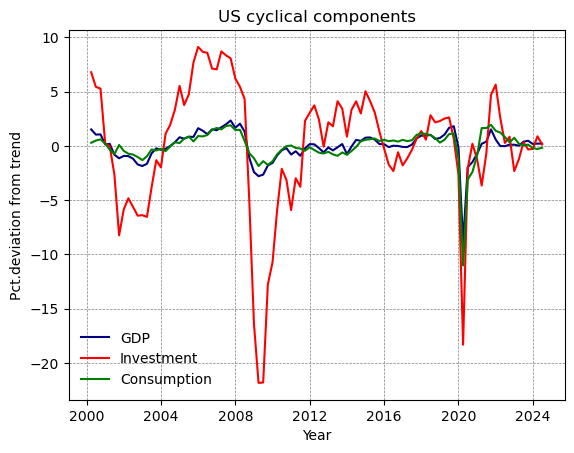

In [200]:
# plot each cyclical component in one graph
plt.plot(cycle, color = 'navy', label = 'GDP')
plt.plot(cycle_inv, color = 'red', label = 'Investment')
plt.plot(cycle_cons, color = 'green', label = 'Consumption')
plt.legend(frameon=False)
#only plot values from year 2000 to 2024
# put titles on x and y axis
plt.xlabel('Year')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Pct.deviation from trend')
plt.savefig('us_bc2_cyc.pdf')
plt.title('US cyclical components')
plt.show()

In [166]:
# same for denmark

# 1. gdp
# a. choose heading namq_10_gdp
den = eurostat.get_data_df('namq_10_gdp', flags = False)

# b. look at the data
den.head()



,freq,unit,s_adj,na_item,geo\TIME_PERIOD,1975-Q1,1975-Q2,1975-Q3,1975-Q4,1976-Q1,...,2022-Q2,2022-Q3,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2,2024-Q3
0,Q,CLV05_MEUR,CA,B1G,AT,NaN,NaN,NaN,NaN,NaN,...,70601.9,70339.8,72492.2,69349.7,69624.4,68899.5,71403.5,68539.0,69101.6,NaN
1,Q,CLV05_MEUR,CA,B1G,CH,NaN,NaN,NaN,NaN,NaN,...,114294.7,113886.9,116293.8,113336.8,114784.4,114241.0,117076.1,114368.6,116782.2,NaN
2,Q,CLV05_MEUR,CA,B1G,CY,NaN,NaN,NaN,NaN,NaN,...,5051.5,5283.0,5139.8,5014.9,5172.5,5411.8,5270.4,5197.0,5364.9,NaN
3,Q,CLV05_MEUR,CA,B1G,CZ,NaN,NaN,NaN,NaN,NaN,...,36566.5,36564.0,36839.6,34535.2,36807.9,36653.9,36786.0,34327.6,36836.2,NaN
4,Q,CLV05_MEUR,CA,B1G,FI,NaN,NaN,NaN,NaN,NaN,...,41803.7,41105.8,42708.4,39772.0,41851.1,40498.5,42097.9,39066.7,41220.2,NaN


In [167]:
# c. choose the b1gq, seasonally and calendar adjusted, chain linked volume index
den_gdp = den.loc[den['unit'] == 'CLV15_MEUR']
den_gdp = den_gdp.loc[den_gdp['s_adj'] == 'SCA']
den_gdp = den_gdp.loc[den_gdp['na_item'] == 'B1GQ']

# d. choose the data for denmark
den_gdp = den_gdp.loc[den_gdp['geo\TIME_PERIOD'] == 'DK']

den_gdp.head()

,freq,unit,s_adj,na_item,geo\TIME_PERIOD,1975-Q1,1975-Q2,1975-Q3,1975-Q4,1976-Q1,...,2022-Q2,2022-Q3,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2,2024-Q3
9290,Q,CLV15_MEUR,SCA,B1GQ,DK,NaN,NaN,NaN,NaN,NaN,...,80106.2,80515.6,79949.5,81400.0,81286.3,82361.4,83761.3,83089.6,84031.1,NaN


In [168]:
# e. choose the data for the period 2000-2023 and transpose the data
den_gdp = den_gdp.loc[:,'2000-Q1':]

den_gdp.tail()


,2000-Q1,2000-Q2,2000-Q3,2000-Q4,2001-Q1,2001-Q2,2001-Q3,2001-Q4,2002-Q1,2002-Q2,...,2022-Q2,2022-Q3,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2,2024-Q3
9290,58539.3,59195.4,59295.5,60261.7,59322.0,59707.8,60106.0,60410.3,59984.0,60088.6,...,80106.2,80515.6,79949.5,81400.0,81286.3,82361.4,83761.3,83089.6,84031.1,NaN


In [169]:
den_gdp = den_gdp.T
# f. take the log of the data
den_gdp = np.log(den_gdp)
den_gdp.head()

,9290
2000-Q1,10.977454
2000-Q2,10.988599
2000-Q3,10.990289
2000-Q4,11.006452
2001-Q1,10.990736


In [174]:
den_gdp = den_gdp.dropna()
#hp filter
cycle_den_gdp, trend_den_gdp = sm.tsa.filters.hpfilter(den_gdp, lamb=1600)
cycle_den_gdp = cycle_den_gdp*100
cycle_den_gdp.head()

2000-Q1   -0.210327
2000-Q2    0.583222
2000-Q3    0.431309
2000-Q4    1.726669
2001-Q1   -0.166559
Name: cycle, dtype: float64

In [105]:
# 2. investment
den = eurostat.get_data_df('namq_10_gdp', flags = False)

In [135]:
# a. choose the p3, seasonally and calendar adjusted, chain linked volume index
den_inv = den.loc[den['unit'] == 'CLV10_MEUR']
den_inv = den_inv.loc[den_inv['s_adj'] == 'SCA']
den_inv = den_inv.loc[den_inv['na_item'] == 'P3']

# b. choose the data for denmark
den_inv = den_inv.loc[den_inv['geo\TIME_PERIOD'] == 'DK']

den_inv.head()


,freq,unit,s_adj,na_item,geo\TIME_PERIOD,1975-Q1,1975-Q2,1975-Q3,1975-Q4,1976-Q1,...,2022-Q2,2022-Q3,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2,2024-Q3
5262,Q,CLV10_MEUR,SCA,P3,DK,NaN,NaN,NaN,NaN,NaN,...,52803.2,52598.4,52748.3,53307.5,53848.2,53307.3,53771.4,54003.3,53841.3,NaN


In [137]:
# c. choose the data for the period 2000-2023 and transpose the data
den_inv = den_inv.loc[:,'2000-Q1':]
den_inv = den_inv.T

# d. take the log of the data
den_inv = np.log(den_inv)

den_inv.head()

,5262
2000-Q1,10.571983
2000-Q2,10.574295
2000-Q3,10.578532
2000-Q4,10.577630
2001-Q1,10.577946


In [175]:
## HP Filter, investment
# drop nans
den_inv = den_inv.dropna()
cycle_den_inv, trend_den_inv = sm.tsa.filters.hpfilter(den_inv, lamb=1600)
cycle_den_inv = cycle_den_inv*100
cycle_den_inv.head()

2000-Q1    1.013415
2000-Q2    0.800515
2000-Q3    0.779597
2000-Q4    0.243023
2001-Q1   -0.175193
Name: cycle, dtype: float64

In [109]:
# 3. consumption
den = eurostat.get_data_df('namq_10_gdp', flags = False)    

In [110]:

# a. choose the p3, seasonally and calendar adjusted, chain linked volume index
den_cons = den.loc[den['unit'] == 'CLV10_MEUR']
den_cons = den_cons.loc[den_cons['s_adj'] == 'SCA']
den_cons = den_cons.loc[den_cons['na_item'] == 'P5G']

# b. choose the data for denmark
den_cons = den_cons.loc[den_cons['geo\TIME_PERIOD'] == 'DK']

den_cons.head()

,freq,unit,s_adj,na_item,geo\TIME_PERIOD,1975-Q1,1975-Q2,1975-Q3,1975-Q4,1976-Q1,...,2022-Q2,2022-Q3,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2,2024-Q3
5687,Q,CLV10_MEUR,SCA,P5G,DK,NaN,NaN,NaN,NaN,NaN,...,20142.8,18182.9,19941.1,16373.7,16884.6,17505.2,15197.8,14230.5,16335.5,NaN


In [132]:
# c. choose the data for the period 2000-2023 and transpose the data
den_cons = den_cons.loc[:,'2000-Q1':]
#den_cons = den_cons.T

den_cons.head()

,5687
2000-Q1,9.385268
2000-Q2,9.364520
2000-Q3,9.320691
2000-Q4,9.382199
2001-Q1,9.306250


In [176]:

# d. take the log of the data
#den_cons = np.log(den_cons)

## HP Filter, consumption
den_cons = den_cons.dropna()
cycle_den_cons, trend_den_cons = sm.tsa.filters.hpfilter(den_cons, lamb=1600)
cycle_den_cons = cycle_den_cons*100

cycle_den_cons.head()

2000-Q1    5.784519
2000-Q2    3.410303
2000-Q3   -1.275513
2000-Q4    4.562895
2001-Q1   -3.358641
Name: cycle, dtype: float64

([<matplotlib.axis.XTick at 0x17ab0e50c10>,
 [Text(0, 0, '2000-Q1'),
  Text(12, 0, '2003-Q1'),
  Text(24, 0, '2006-Q1'),
  Text(36, 0, '2009-Q1'),
  Text(48, 0, '2012-Q1'),
  Text(60, 0, '2015-Q1'),
  Text(72, 0, '2018-Q1'),
  Text(84, 0, '2021-Q1'),
  Text(96, 0, '2024-Q1')])

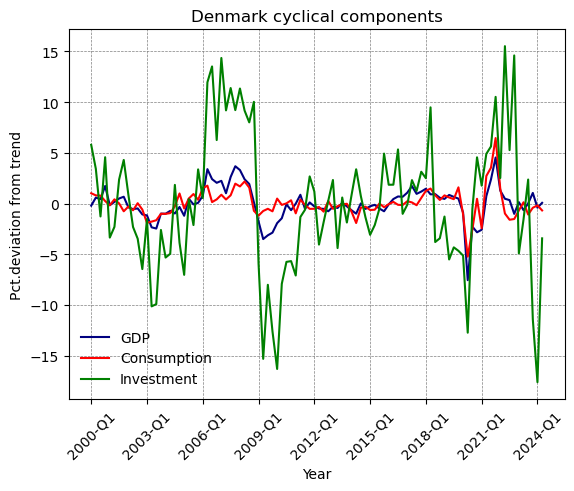

In [190]:
#plot cyclical components
plt.plot(cycle_den_gdp, color = 'navy', label = 'GDP')
plt.plot(cycle_den_inv, color = 'red', label = 'Consumption')
plt.plot(cycle_den_cons, color = 'green', label = 'Investment')
plt.legend(frameon=False)
plt.xlabel('Year')
plt.ylabel('Pct.deviation from trend')
plt.savefig('den_bc2_cyc.pdf')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.title('Denmark cyclical components')
#only have ticks for every 4th year
plt.xticks(np.arange(0, len(cycle_den_gdp), step=12), rotation = 45)


In [114]:
# beveridge curve
# 2. define function

def bev(u, v, delta,gamma):
    return delta/(delta +u**gamma* v**(1-gamma))

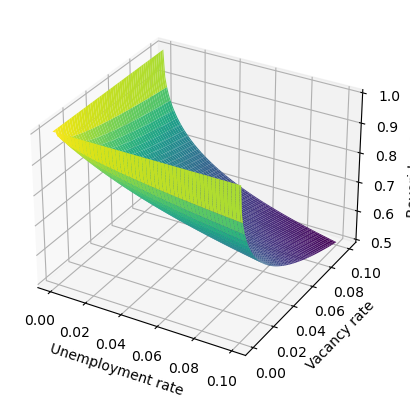

In [129]:
#plot beveridge curve
u = np.linspace(0, 0.1, 100)
v = np.linspace(0, 0.1, 100)
delta = 0.1
gamma = 0.5

U, V = np.meshgrid(u, v)
Z = bev(U, V, delta, gamma)

fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(U, V, Z, cmap='viridis')
ax.set_xlabel('Unemployment rate')
ax.set_ylabel('Vacancy rate')
ax.set_zlabel('Beveridge curve')
plt.show()

# make plot interactive
import plotly.graph_objects as go
import numpy as np

u = np.linspace(0, 0.1, 100)
v = np.linspace(0, 0.1, 100)
delta = 0.1
gamma = 0.5

U, V = np.meshgrid(u, v)
Z = bev(U, V, delta, gamma)

fig = go.Figure(data=[go.Surface(z=Z, x=U, y=V)])
fig.update_layout(scene = dict(
                    xaxis_title='U',
                    yaxis_title='V',
                    zaxis_title='BC'))
fig.show()



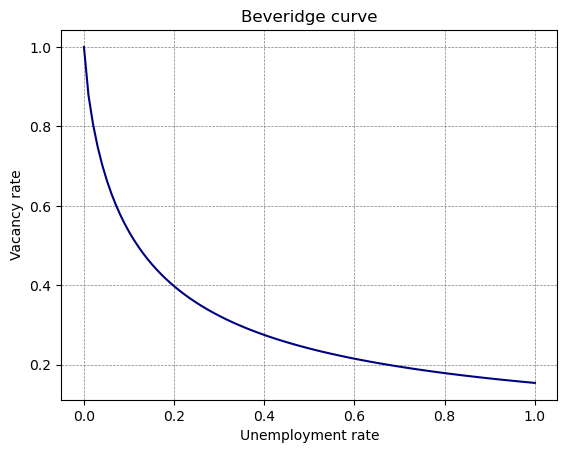

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9860\3529462617.py:23: RuntimeWarning: divide by zero encountered in divide
  v_bev = ((delta/u_vec-delta))**(1/(1-phi))*u_vec
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9860\3529462617.py:23: RuntimeWarning: invalid value encountered in multiply
  v_bev = ((delta/u_vec-delta))**(1/(1-phi))*u_vec


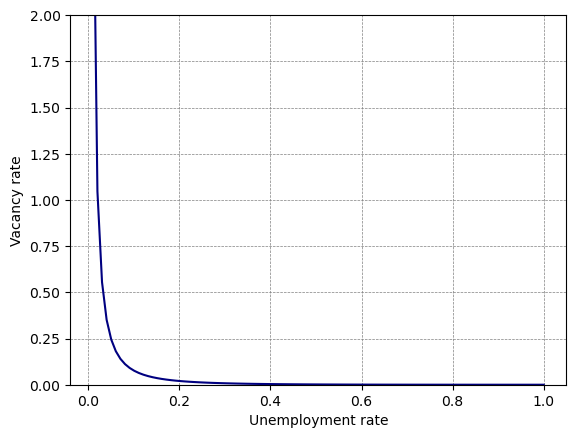

In [63]:
# plot beveridge curve holding u constant
# 1. define function
def bev_u(u, v, delta, gamma):
    return delta/(delta +u**gamma* v**(1-gamma))

#plot
u = 0.05
v = np.linspace(0, 1, 100)
delta = 0.1
gamma = 0.2
plt.plot(v, bev_u(u, v, delta, gamma), color = 'navy')
plt.xlabel('Unemployment rate')
plt.ylabel('Vacancy rate')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.title('Beveridge curve')
plt.show()


# 2. plot
phi = 0.6
delta = 0.1
u_vec = np.linspace(0,1,100)
v_bev = ((delta/u_vec-delta))**(1/(1-phi))*u_vec 
plt.plot(u_vec,v_bev, label = 'Beveridge curve', color = 'navy')
plt.ylim(0,2)
plt.xlabel('Unemployment rate')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Vacancy rate')
plt.show()

In [199]:
# compute standard deviations for each series in both countries
std_us_gdp = np.std(cycle)
std_us_inv = np.std(cycle_inv)
std_us_cons = np.std(cycle_cons)

std_den_gdp = np.std(cycle_den_gdp)
std_den_inv = np.std(cycle_den_inv)
std_den_cons = np.std(cycle_den_cons)

print('US GDP:', std_us_gdp)
print('US Investment:', std_us_inv)
print('US Consumption:', std_us_cons)

print('Denmark GDP:', std_den_gdp)
print('Denmark consumption:', std_den_inv)
print('Denmark investment:', std_den_cons)

US GDP: 1.3848772269584986
US Investment: 5.939000318788099
US Consumption: 1.469541316095202
Denmark GDP: 1.6303847468814046
Denmark consumption: 1.3309883261130568
Denmark investment: 6.706774519358336


In [204]:
# make table with std. devs.
data = {'US':[std_us_gdp, std_us_inv, std_us_cons,(std_us_inv/std_us_cons)], 'Denmark':[std_den_gdp, std_den_cons, std_den_inv, (std_den_cons/std_den_inv)]}
df = pd.DataFrame(data, index = ['GDP', 'Investment', 'Consumption','sigma_i/sigma_c'])
df

,US,Denmark
GDP,1.384877,1.630385
Investment,5.939000,6.706775
Consumption,1.469541,1.330988
sigma_i/sigma_c,4.041397,5.038943


In [118]:
# vacancies and lmtloyment
# a. fetch quarterly data on vacancies from Eurostat, seasonally adjusted and nace_r2 = B-N
vac = eurostat.get_data_df('jvs_q_nace2', flags = False)
vac = vac.loc[vac['indic_em'] == 'JOBRATE']
vac = vac.loc[vac['s_adj'] == 'SA'] 
vac = vac.loc[vac['nace_r2'] == 'B-N']
# b. choose the data for denmark
vac = vac.loc[vac['geo\TIME_PERIOD'] == 'DK']
# all firm sizes
vac = vac.loc[vac['sizeclas'] == 'TOTAL']
vac.head()

,freq,s_adj,nace_r2,sizeclas,indic_em,geo\TIME_PERIOD,2001-Q1,2001-Q2,2001-Q3,2001-Q4,...,2022-Q1,2022-Q2,2022-Q3,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2
8472,Q,SA,B-N,TOTAL,JOBRATE,DK,NaN,NaN,NaN,NaN,...,3.6,3.5,3.4,3.2,2.9,2.7,2.6,2.5,2.5,2.5


In [119]:
# b. fetch quarterly data on unemployment from Eurostat, seasonally adjusted, all genders, age 15-74
unemp = eurostat.get_data_df('une_rt_q', flags = False)
unemp = unemp.loc[unemp['unit'] == 'PC_ACT']   
unemp = unemp.loc[unemp['s_adj'] == 'SA']
unemp = unemp.loc[unemp['sex'] == 'T']
unemp = unemp.loc[unemp['age'] == 'Y15-74']
unemp = unemp.loc[unemp['geo\TIME_PERIOD'] == 'DK']
unemp.head()

,freq,s_adj,age,unit,sex,geo\TIME_PERIOD,2003-Q1,2003-Q2,2003-Q3,2003-Q4,...,2022-Q1,2022-Q2,2022-Q3,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2
3079,Q,SA,Y15-74,PC_ACT,T,DK,NaN,NaN,NaN,NaN,...,4.3,4.3,4.6,4.6,4.7,4.9,4.9,5.9,5.8,6.1


In [120]:
# transpose the data
#vac = vac.loc[:,'2000-Q1':]
vac = vac.T
#unemp = unemp.loc[:,'2000-Q1':]
unemp = unemp.T
vac.head()
unemp.head()

,3079
freq,Q
s_adj,SA
age,Y15-74
unit,PC_ACT
sex,T


In [121]:
# prepare data for scatter plot
# a. merge the data
df = pd.merge(vac, unemp, left_index = True, right_index = True)
df.columns = ['vacancies', 'unemployment']
df = df.dropna()
# drop the first row
df = df[3:]
df.head()

,vacancies,unemployment
2010-Q1,1.2,7.8
2010-Q2,1.2,7.7
2010-Q3,1.2,7.6
2010-Q4,1.3,7.8
2011-Q1,1.3,8.0


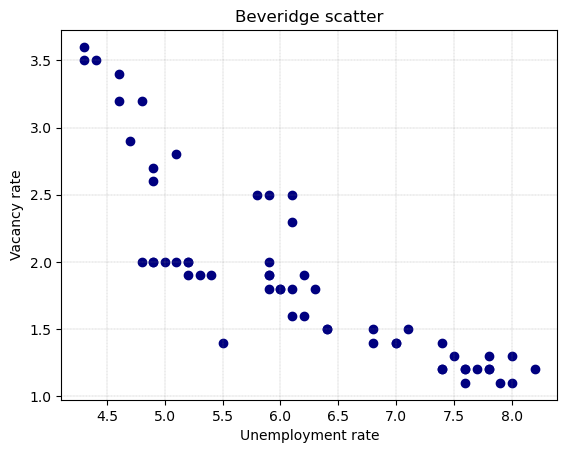

In [122]:
# scatter plot
plt.scatter(df['unemployment'], df['vacancies'], color = 'navy')
plt.ylabel('Vacancy rate')
plt.xlabel('Unemployment rate')
plt.title('Beveridge scatter')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.2)

In [123]:
# create variable for market tightness
df['tightness'] = df['vacancies']/df['unemployment']

([<matplotlib.axis.XTick at 0x17abc84d490>,
 [Text(0, 0, '2010-Q1'),
  Text(6, 0, '2011-Q3'),
  Text(12, 0, '2013-Q1'),
  Text(18, 0, '2014-Q3'),
  Text(24, 0, '2016-Q1'),
  Text(30, 0, '2017-Q3'),
  Text(36, 0, '2019-Q1'),
  Text(42, 0, '2020-Q3'),
  Text(48, 0, '2022-Q1'),
  Text(54, 0, '2023-Q3')])

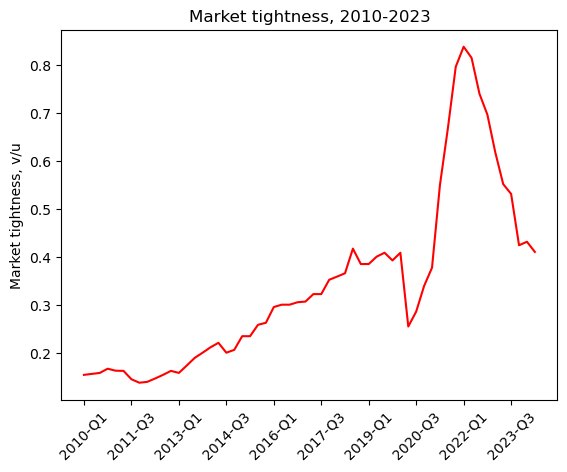

In [124]:
plt.plot(df['tightness'], color = 'red')
plt.ylabel('Market tightness, v/u')
plt.title('Market tightness, 2010-2023')
plt.xticks(np.arange(0, len(df), step=6), rotation = 45)

In [125]:
# lfsi_long_q
# U_E, U_U, E_E, E_U
# THS_PER
# jf = U_E/(U_E+U_U)
# separation rate = E_U/(E_E+E_U)

In [126]:
# a. fetch labor market transtion data for denmark from eurostat
lmt = eurostat.get_data_df('lfsi_long_q', flags = False)
# b. reduce data to relevant variables
lmt.head()

,freq,unit,s_adj,indic_em,sex,geo\TIME_PERIOD,2003-Q2,2003-Q3,2003-Q4,2004-Q1,...,2022-Q1,2022-Q2,2022-Q3,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2
0,Q,PC_EMP,NSA,E_E,F,AT,NaN,NaN,NaN,NaN,...,95.4,95.7,95.1,94.4,94.8,95.6,94.8,93.7,95.4,95.8
1,Q,PC_EMP,NSA,E_E,F,BE,NaN,NaN,NaN,NaN,...,95.9,96.1,96.4,95.6,95.2,95.4,96.1,95.2,94.8,96.8
2,Q,PC_EMP,NSA,E_E,F,BG,NaN,NaN,NaN,NaN,...,99.1,99.0,99.5,98.4,97.7,98.3,99.3,97.0,98.9,99.2
3,Q,PC_EMP,NSA,E_E,F,CH,NaN,NaN,NaN,NaN,...,95.4,96.6,95.4,96.5,96.3,96.6,95.2,95.8,95.9,96.0
4,Q,PC_EMP,NSA,E_E,F,CY,NaN,NaN,NaN,NaN,...,96.7,98.5,97.1,97.4,98.6,98.3,98.3,97.0,97.0,98.3


In [127]:
# b. reduce data to relevant variables
lmt = lmt.loc[lmt['geo\TIME_PERIOD'] == 'DK']
lmt = lmt.loc[lmt['unit'] == 'THS_PER']   
lmt = lmt.loc[lmt['s_adj'] == 'SA']
lmt = lmt.loc[lmt['sex']== 'T']
lmt.head()

,freq,unit,s_adj,indic_em,sex,geo\TIME_PERIOD,2003-Q2,2003-Q3,2003-Q4,2004-Q1,...,2022-Q1,2022-Q2,2022-Q3,2022-Q4,2023-Q1,2023-Q2,2023-Q3,2023-Q4,2024-Q1,2024-Q2
6692,Q,THS_PER,SA,E_E,T,DK,NaN,NaN,NaN,NaN,...,2775.0,2805.0,2807.0,2808.0,2829.0,2851.0,2831.0,2854.0,2889.0,2905.0
6797,Q,THS_PER,SA,E_I,T,DK,NaN,NaN,NaN,NaN,...,111.0,99.0,105.0,101.0,100.0,104.0,109.0,81.0,80.0,97.0
6902,Q,THS_PER,SA,E_U,T,DK,NaN,NaN,NaN,NaN,...,48.0,40.0,57.0,69.0,61.0,61.0,47.0,64.0,42.0,65.0
7007,Q,THS_PER,SA,I_E,T,DK,NaN,NaN,NaN,NaN,...,112.0,108.0,107.0,107.0,100.0,95.0,100.0,102.0,85.0,86.0
7112,Q,THS_PER,SA,I_I,T,DK,NaN,NaN,NaN,NaN,...,1133.0,1124.0,1103.0,1101.0,1098.0,1101.0,1102.0,1081.0,1037.0,1017.0


In [128]:
# c. create loop to fetchonly E_U, E_E, U_E, U_U
vars = ['E_E','E_U','U_E','U_U']
for var in vars:

    lmt_temp = lmt.loc[lmt['indic_em'] == var] 
    lmt_temp = lmt_temp.T
    lmt_temp = lmt_temp[3:]
    lmt_temp = lmt_temp.dropna()
    
    plt.plot(lmt_temp[''], lmt_temp.OBS_VALUE, label = var, linestyle = LS[i])
    i+=1
plt.legend()
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Average annual hours actually worked per worker')
plt.xlabel('Years')
plt.savefig('hours_time.pdf')
plt.show()

KeyError: ''

In [26]:
gamma = 2

lam = 0.95*(1.02)**(1-gamma)+0.05*(0.62)**(1-gamma)
lam1 = lam**(1/(1-gamma))
print(lam1)
1/lam1



0.988125


1.0120177103099304